# lm_fit

## Logistic growth

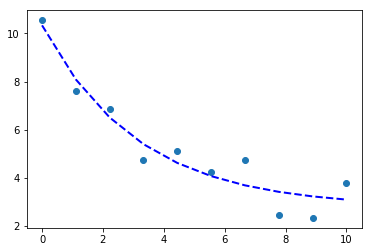

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

def exp(x, t, ps):
    """Receptor synthesis-internalization model."""
    try:
        a = ps['a'].value
        b = ps['b'].value
    except:
        a, b = ps

    return a - b*x

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['x0'].value
    model = g(ts, x0, ps)
    return (model - data).ravel()

a = 2.0
b = 0.5
true_params = [a, b]
x0 = 10.0

t = np.linspace(0, 10, 10)
data = g(t, x0, true_params)
data += np.random.normal(size=data.shape)

# set parameters incluing bounds
params = Parameters()
params.add('x0', value=float(data[0]), min=0, max=100)
params.add('a', value= 9.0, min=0, max=10)
params.add('b', value= 9.0, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '--', linewidth=2, c='blue');

# display fitted statistics
# report_fit(result)

## Lotka-Volterra

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 89
    # data points      = 200
    # variables        = 6
    chi-square         = 184.624243
    reduced chi-square = 0.95167135
    Akaike info crit   = -3.99894552
    Bayesian info crit = 15.7909587
[[Variables]]
    x0:  0.86847170 +/- 0.15394768 (17.73%) (init = 0.8515674)
    y0:  0.96891673 +/- 0.09631050 (9.94%) (init = 0.1368585)
    a:   3.30657605 +/- 0.39445531 (11.93%) (init = 5)
    b:   1.11406099 +/- 0.12699242 (11.40%) (init = 3)
    c:   0.99634714 +/- 0.08605977 (8.64%) (init = 3)
    d:   0.94823644 +/- 0.08599784 (9.07%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)   =  0.961
    C(a, d)   = -0.955
    C(b, d)   = -0.876
    C(x0, b)  = -0.804
    C(x0, a)  = -0.792
    C(y0, c)  = -0.682
    C(y0, d)  = -0.678
    C(x0, d)  =  0.634
    C(c, d)   =  0.618
    C(a, c)   = -0.484
    C(y0, a)  =  0.468
    C(b, c)   = -0.385
    C(y0, b)  =  0.263
    C(x0

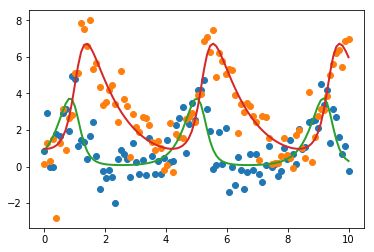

In [191]:
def lotka_volterra(xs, t, ps):
    """Lotka-Volterra predator-prey model."""
    try:
        a = ps['a'].value
        b = ps['b'].value
        c = ps['c'].value
        d = ps['d'].value
    except:
        a, b, c, d = ps

    x, y = xs
    return [a*x - b*x*y, c*x*y - d*y]

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['x0'].value, ps['y0'].value
    model = g(ts, x0, ps)
    return (model - data).ravel()

t = np.linspace(0, 10, 100)
x0 = np.array([1,1])

a, b, c, d = 3,1,1,1
true_params = np.array((a, b, c, d))
data = g(t, x0, true_params)
data += np.random.normal(size=data.shape)

# set parameters incluing bounds
params = Parameters()
params.add('x0', value= float(data[0, 0]), min=0, max=10)
params.add('y0', value=float(data[0, 1]), min=0, max=10)
params.add('a', value=5.0, min=0, max=10)
params.add('b', value=3.0, min=0, max=10)
params.add('c', value=3.0, min=0, max=10)
params.add('d', value=3.0, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '-', linewidth=2);

# display fitted statistics
report_fit(result)